In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.svm import SVR
import tensorflow as tf
import pandas as pd
import numpy as np
import math


path = "/content/drive/MyDrive/Colab Notebooks/Weather Forcast/Datasets/NASA_Hour.csv"
df = pd.read_csv(path)

In [ ]:
df

,Year,Month,Day,Time,Temperature,Humidity,Pressure,Direction,WindSpeed
0,2018,1,1,0,21.40,81.75,100.88,337.53,2.00
1,2018,1,1,1,20.89,84.94,100.84,347.71,2.42
2,2018,1,1,2,20.41,87.69,100.80,355.02,2.79
3,2018,1,1,3,20.05,89.56,100.79,359.69,2.89
4,2018,1,1,4,19.78,90.44,100.81,1.58,2.84
...,...,...,...,...,...,...,...,...,...
28459,2021,3,31,19,27.18,85.69,99.85,166.18,6.90
28460,2021,3,31,20,26.94,87.50,99.92,161.50,6.90
28461,2021,3,31,21,26.80,88.31,99.96,160.32,6.96
28462,2021,3,31,22,26.80,88.31,99.97,161.86,7.10


In [ ]:
y = list(df["Year"])
m = list(df["Month"])
d = list(df["Day"])
h = list(df["Time"])

time=[]
for i in range(0, len(h)):
  time.append(pd.Timestamp(y[i], m[i], d[i], h[i]))

df['Date']= time

In [ ]:
df = df.drop(['Year', 'Month', 'Day', 'Time'], axis =1)

In [ ]:
df

,Temperature,Humidity,Pressure,Direction,WindSpeed,Date
0,21.40,81.75,100.88,337.53,2.00,2018-01-01 00:00:00
1,20.89,84.94,100.84,347.71,2.42,2018-01-01 01:00:00
2,20.41,87.69,100.80,355.02,2.79,2018-01-01 02:00:00
3,20.05,89.56,100.79,359.69,2.89,2018-01-01 03:00:00
4,19.78,90.44,100.81,1.58,2.84,2018-01-01 04:00:00
...,...,...,...,...,...,...
28459,27.18,85.69,99.85,166.18,6.90,2021-03-31 19:00:00
28460,26.94,87.50,99.92,161.50,6.90,2021-03-31 20:00:00
28461,26.80,88.31,99.96,160.32,6.96,2021-03-31 21:00:00
28462,26.80,88.31,99.97,161.86,7.10,2021-03-31 22:00:00


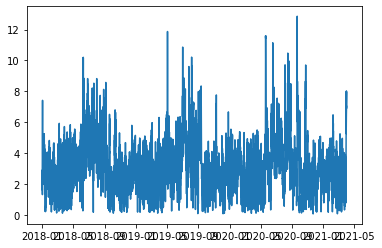

In [ ]:
plt.plot(df['Date'], df['WindSpeed'])

In [ ]:
df['TomorrowSpeed'] = df.WindSpeed.shift(-1, fill_value= math.nan)

In [ ]:
cols = ['Date', 'Temperature', 'Humidity','Pressure', 'Direction','WindSpeed', 'TomorrowSpeed']
df = df[cols]
df

,Date,Temperature,Humidity,Pressure,Direction,WindSpeed,TomorrowSpeed
0,2018-01-01 00:00:00,21.40,81.75,100.88,337.53,2.00,2.42
1,2018-01-01 01:00:00,20.89,84.94,100.84,347.71,2.42,2.79
2,2018-01-01 02:00:00,20.41,87.69,100.80,355.02,2.79,2.89
3,2018-01-01 03:00:00,20.05,89.56,100.79,359.69,2.89,2.84
4,2018-01-01 04:00:00,19.78,90.44,100.81,1.58,2.84,2.73
...,...,...,...,...,...,...,...
28459,2021-03-31 19:00:00,27.18,85.69,99.85,166.18,6.90,6.90
28460,2021-03-31 20:00:00,26.94,87.50,99.92,161.50,6.90,6.96
28461,2021-03-31 21:00:00,26.80,88.31,99.96,160.32,6.96,7.10
28462,2021-03-31 22:00:00,26.80,88.31,99.97,161.86,7.10,7.02


In [ ]:
NaN_index = df.index[pd.isnull(df['TomorrowSpeed'])].tolist()

df = df.drop(NaN_index)

In [ ]:
pd.isnull(df).any(1)

0        False
1        False
2        False
3        False
4        False
         ...  
28458    False
28459    False
28460    False
28461    False
28462    False
Length: 28463, dtype: bool

In [ ]:
df

,Date,Temperature,Humidity,Pressure,Direction,WindSpeed,TomorrowSpeed
0,2018-01-01 00:00:00,21.40,81.75,100.88,337.53,2.00,2.42
1,2018-01-01 01:00:00,20.89,84.94,100.84,347.71,2.42,2.79
2,2018-01-01 02:00:00,20.41,87.69,100.80,355.02,2.79,2.89
3,2018-01-01 03:00:00,20.05,89.56,100.79,359.69,2.89,2.84
4,2018-01-01 04:00:00,19.78,90.44,100.81,1.58,2.84,2.73
...,...,...,...,...,...,...,...
28458,2021-03-31 18:00:00,27.58,82.44,99.78,171.45,6.88,6.90
28459,2021-03-31 19:00:00,27.18,85.69,99.85,166.18,6.90,6.90
28460,2021-03-31 20:00:00,26.94,87.50,99.92,161.50,6.90,6.96
28461,2021-03-31 21:00:00,26.80,88.31,99.96,160.32,6.96,7.10


In [ ]:
X = df.iloc[:, 1:6].values 
Y = df.iloc[:, 6].values
date = df.iloc[-100:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.0035, shuffle =False)

print(len(X_train))
print(len(X_test))

28363
100


In [ ]:
scaler = preprocessing.RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
classifier = SVR(kernel = 'rbf', epsilon=0.001)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

trueValue = y_test
predictValue = y_pred

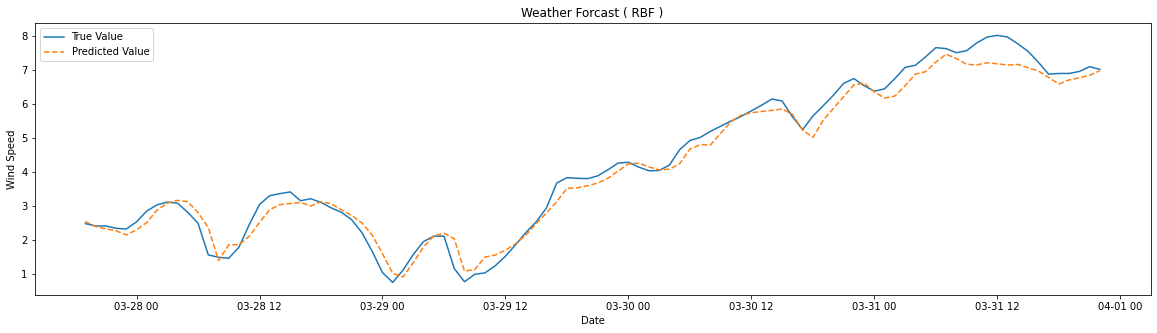

In [ ]:
plt.figure(figsize=(20,5))

plt.title("Weather Forcast ( RBF )")
plt.xlabel("Date")
plt.ylabel("Wind Speed")


plt.plot(date, trueValue)
plt.plot(date, predictValue, "--")

plt.legend(["True Value", "Predicted Value"])

plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(mse)
print( '(RBF) Root Mean Squared Error = ' , RMSE, '\n')

MAE = mean_absolute_error(y_test, y_pred)
print('(RBF) Mean Absolute Error = ' , MAE, '\n')

R_squere = r2_score(y_test, y_pred)
print('(RBF) R Squared Error = ' , R_squere, '\n')

MAPE = mean_absolute_percentage_error(y_test, y_pred)
print('(RBF) Mean Absolute Percentage Error = ' , MAPE)

(RBF) Root Mean Squared Error =  0.3333663300334933 

(RBF) Mean Absolute Error =  0.26338999999999996 

(RBF) R Squared Error =  0.9768775146468565 

(RBF) Mean Absolute Percentage Error =  0.08993386393548276
